In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Cấu hình
plt.rcParams['font.size'] = 11
plt.rcParams['figure.figsize'] = (12, 10)

print("📂 Đang tải dữ liệu...")
df_events = pd.read_csv('../data/udk_moodle_log.csv')
print(f"✅ Đã tải {len(df_events):,} events")

📂 Đang tải dữ liệu...
✅ Đã tải 1,259,411 events


In [2]:
# Phân loại events
def classify_event(event_name):
    event_lower = str(event_name).lower()
    
    # System events
    system_keywords = ['webservice', 'token', 'loggedin', 'loggedout', 'notification']
    if any(keyword in event_lower for keyword in system_keywords):
        return 'System Event'
    
    # User learning events
    learning_keywords = ['viewed', 'submitted', 'started', 'created', 'attempt', 'quiz', 'assignment', 'forum']
    if any(keyword in event_lower for keyword in learning_keywords):
        return 'User Learning Event'
    
    return 'Other'

df_events['event_category'] = df_events['eventname'].apply(classify_event)


💾 Đang lưu biểu đồ...
✅ Đã lưu: challenge_1b_system_noise_events.png
✅ Đã lưu: challenge_1b_system_noise_events.pdf


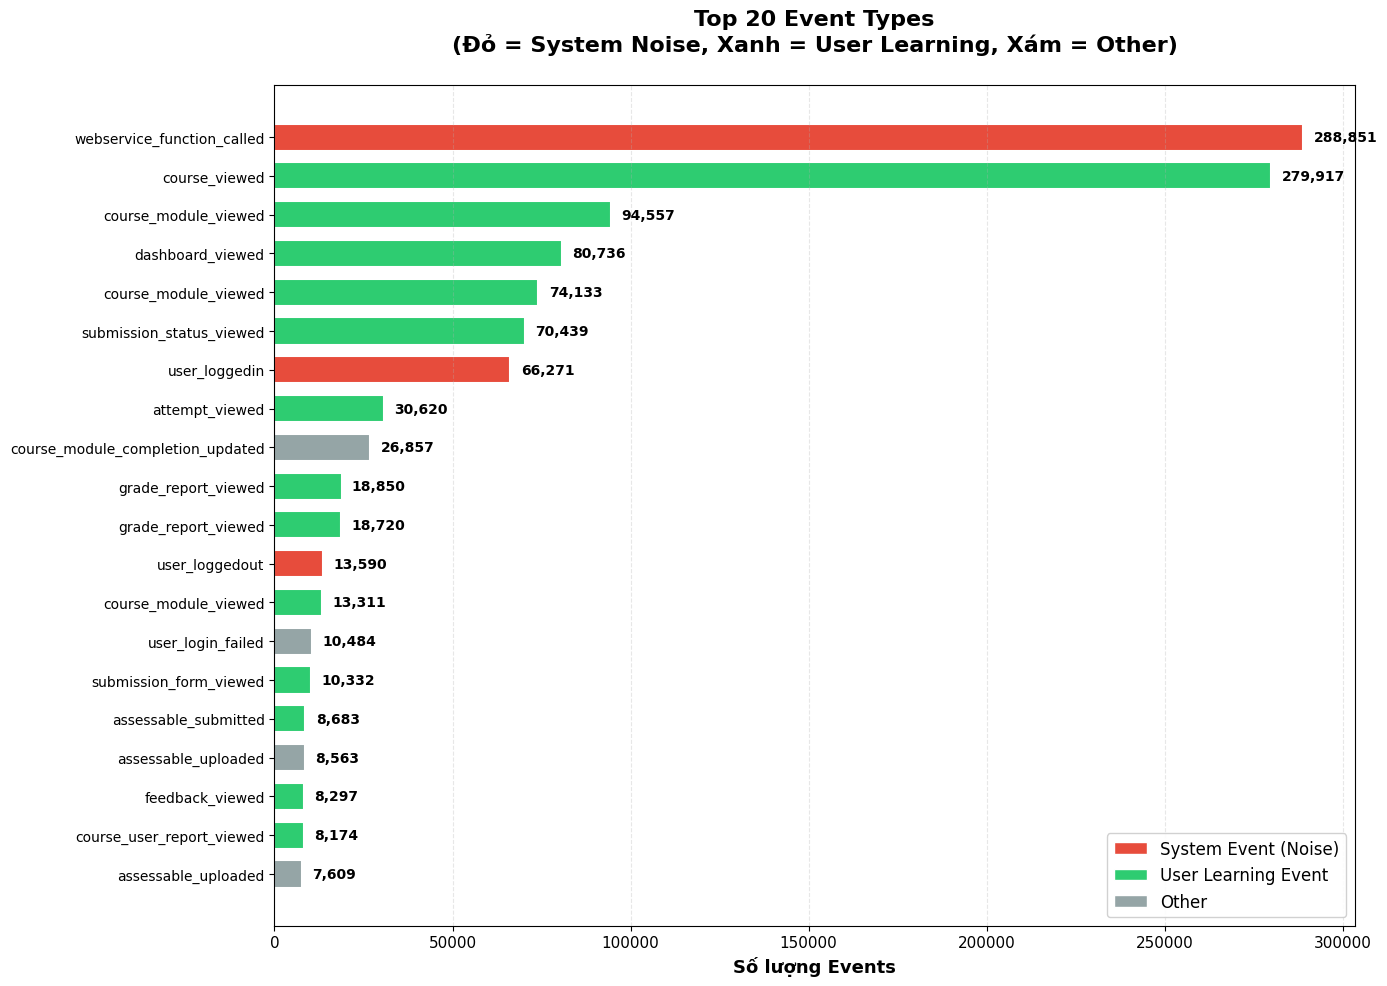


🎉 HOÀN THÀNH!


In [3]:
# Tạo biểu đồ Top 20 Event Types
fig, ax = plt.subplots(figsize=(14, 10))

colors = {
    'System Event': '#e74c3c',        # Đỏ - noise
    'User Learning Event': '#2ecc71', # Xanh - useful
    'Other': '#95a5a6'                # Xám - unknown
}

top_events = df_events['eventname'].value_counts().head(20)
event_colors = [colors[classify_event(event)] for event in top_events.index]

# Rút gọn tên event
event_names_short = []
for name in top_events.index:
    short_name = name.split('\\')[-1]
    if len(short_name) > 40:
        short_name = short_name[:37] + '...'
    event_names_short.append(short_name)

# Vẽ horizontal bar chart
bars = ax.barh(range(len(top_events)), top_events.values, color=event_colors, 
               edgecolor='white', linewidth=1.5, height=0.7)

ax.set_yticks(range(len(top_events)))
ax.set_yticklabels(event_names_short, fontsize=10)
ax.set_xlabel('Số lượng Events', fontweight='bold', fontsize=13)
ax.set_title('Top 20 Event Types\n(Đỏ = System Noise, Xanh = User Learning, Xám = Other)',
             fontsize=16, fontweight='bold', pad=25)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.invert_yaxis()

# Thêm giá trị số lượng
for i, (bar, val) in enumerate(zip(bars, top_events.values)):
    ax.text(val + max(top_events.values)*0.01, i, f'{val:,}',
            va='center', fontsize=10, fontweight='bold')

# Thêm legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=colors['System Event'], edgecolor='white', label='System Event (Noise)'),
    Patch(facecolor=colors['User Learning Event'], edgecolor='white', label='User Learning Event'),
    Patch(facecolor=colors['Other'], edgecolor='white', label='Other')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=12, framealpha=0.9)

plt.tight_layout()

# Lưu file
print("\n💾 Đang lưu biểu đồ...")
plt.savefig('challenge_1b_system_noise_events.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✅ Đã lưu: challenge_1b_system_noise_events.png")

plt.savefig('challenge_1b_system_noise_events.pdf', dpi=300, bbox_inches='tight', facecolor='white')
print("✅ Đã lưu: challenge_1b_system_noise_events.pdf")

plt.show()

print("\n🎉 HOÀN THÀNH!")